In [1]:
# the goal is a systematic comparison of the two disciplines.
# how do their concepts' connections influence the others'
# this is impossible, but we can get descriptives that at least get close

In [2]:
import sys
sys.path.append("./../helper/") 

In [3]:
from temporal_networks import *

Loading ..\counting\wos-soc-limitedtitles-cooc from disk...
Loading ..\counting\wos-econ-limitedtitles-cooc from disk...
663 663 terms from soc, econ


In [4]:
YMIN, YMAX, YSTEP, YWINDOW = 1950, 2010, 5, 10
YS = range(YMIN, YMAX, YSTEP)

In [5]:
tn1 = get_tnets(cc_soc, 'behavior', pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
tn2 = get_tnets(cc_econ, 'behavior', pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)

max accepted p-value: 0.0008037092933977183


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0007968779931887726


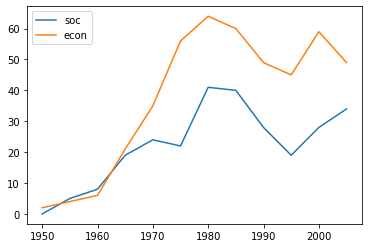

In [7]:
# total terms in the network, over time
plt.plot( YS, np.sum( tn1>0, axis=1 ), label='soc-nwords' )
plt.plot( YS, np.sum( tn2>0, axis=1 ), label='econ-nwords' )
plt.legend();

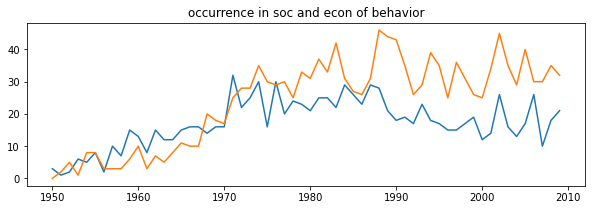

In [18]:
plt.figure(figsize=(10,3))
YSfine = range(YMIN, YMAX)
plt.plot(    YSfine,    [cc_soc(t='behavior', fy=Y) for Y in YSfine],    label='soc'    )
plt.plot(    YSfine,    [cc_econ(t='behavior', fy=Y) for Y in YSfine],    label='econ'    )
plt.title('occurrence in soc and econ of behavior');

The decision from this graph would be to limit to the top 20 in the egonet
    and only after 1965.

We could also increase the window (it's already 10 years, though).

In [8]:
tn1 = get_tnets(cc_soc, 'family', pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
tn2 = get_tnets(cc_econ, 'family', pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)

max accepted p-value: 0.0008060119404872018


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008310108224429559


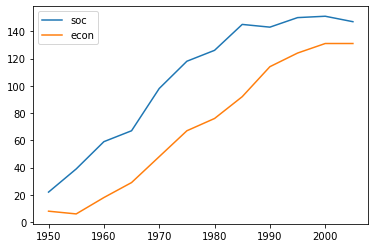

In [9]:
# total terms in the network, over time
plt.plot( YS, np.sum( tn1>0, axis=1 ), label='soc' )
plt.plot( YS, np.sum( tn2>0, axis=1 ), label='econ' )
plt.legend();

Text(0.5, 1.0, 'occurrence in soc and econ of family')

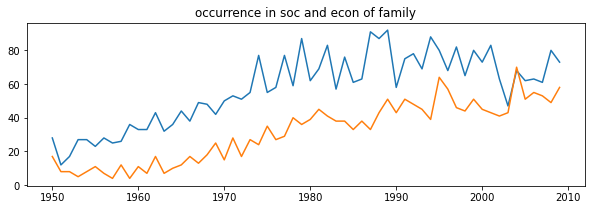

In [17]:
plt.figure(figsize=(10,3))
YSfine = range(YMIN, YMAX)
plt.plot(    YSfine,    [cc_soc(t='family', fy=Y) for Y in YSfine],    label='soc'    )
plt.plot(    YSfine,    [cc_econ(t='family', fy=Y) for Y in YSfine],    label='econ'    )
plt.title('occurrence in soc and econ of family');

but it's clear that for "family" there is an ever-increasing set of words in this network.
and it's not clear that the # of occurrences is that much higher, or ever-increasing as the "cognitive extent" (size of egonet) would imply

# let's just check it out. what do the different comparisons look like with just a p-value cutoff

remember, this is just the jaccard // of the number of words in either, what proportion are in both?

we could (should?) do something considering magnitudes as well...

In [52]:
# we skip the first two words because they are 'review' and 'article'
# in BOTH
# these could also be filtered by their ego-net size
top_words = sorted(cc_soc.terms, key=lambda x:-cc_soc(t=x))[2:12]
top_words += sorted(cc_econ.terms, key=lambda x:-cc_econ(t=x))[2:12]

top_words = sorted(set(top_words))

max accepted p-value: 0.0008074248344851144


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0007996404870004632


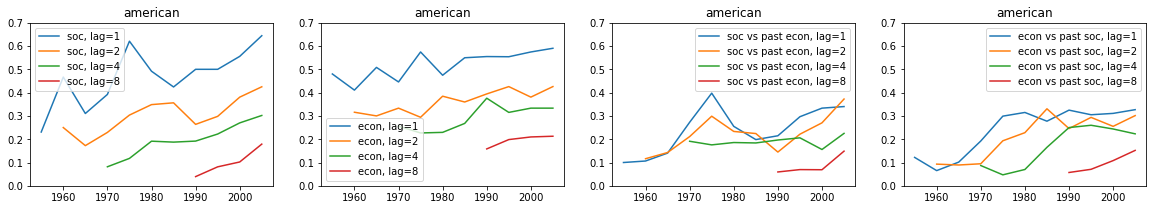

max accepted p-value: 0.0008074248344851144


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008053183135465158


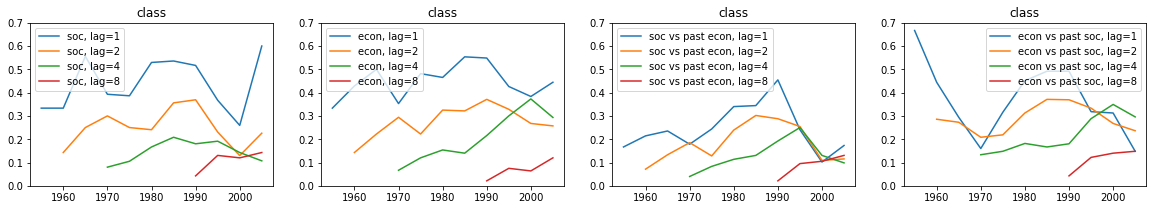

max accepted p-value: 0.0008014866007978158


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.000820347128436591


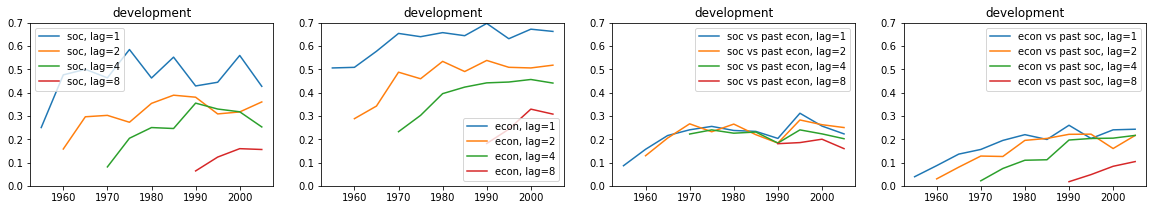

max accepted p-value: 0.0007809673130906485


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008307594696538091


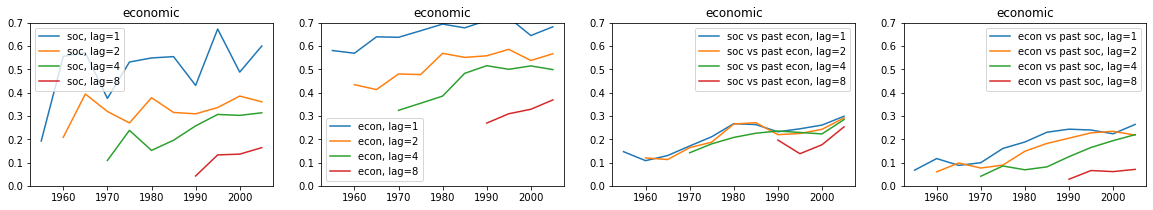

max accepted p-value: 0.0008287277837691653


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0007971357462691932


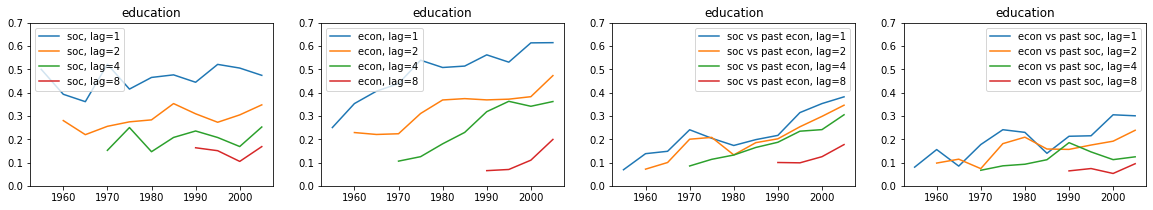

max accepted p-value: 0.0007063495442173514


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008307412342669481


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: i

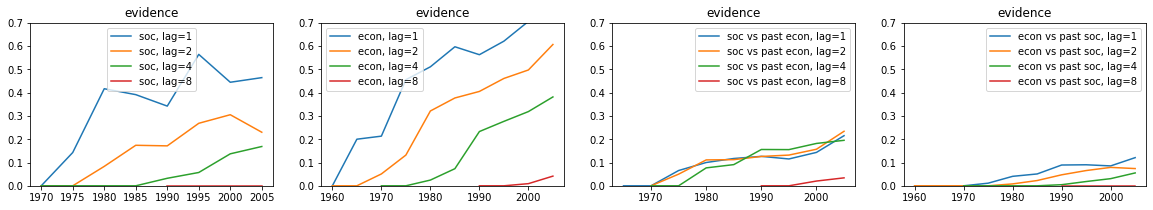

max accepted p-value: 0.0008060119404872018


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008310108224429559


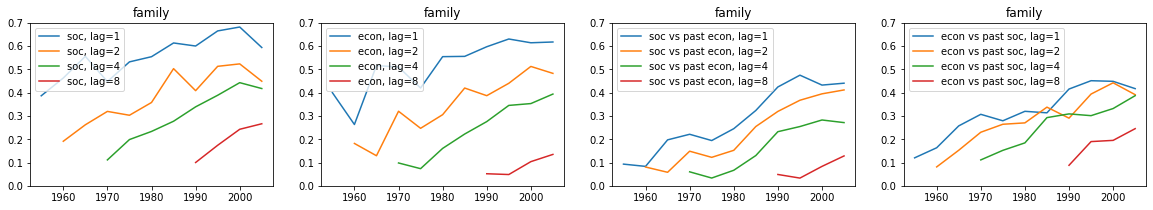

max accepted p-value: 0.0008308826062283931


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0007712201914924548


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
c:\users\amcga\e

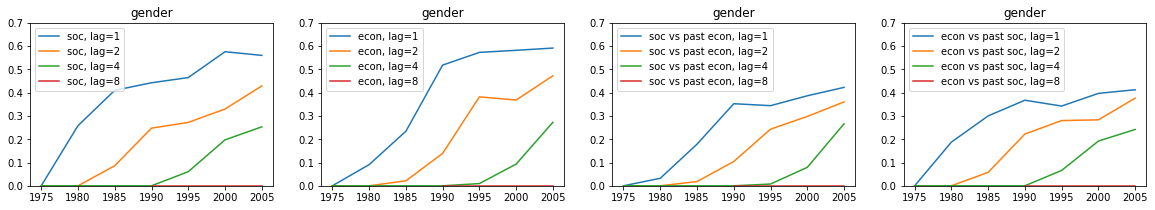

max accepted p-value: 1.9049124950713427e-06


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0007961340177583442


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


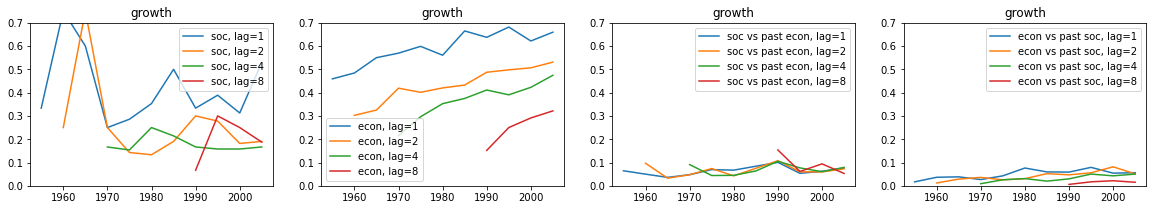

max accepted p-value: 0.0008114438984337918


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008142040524182437


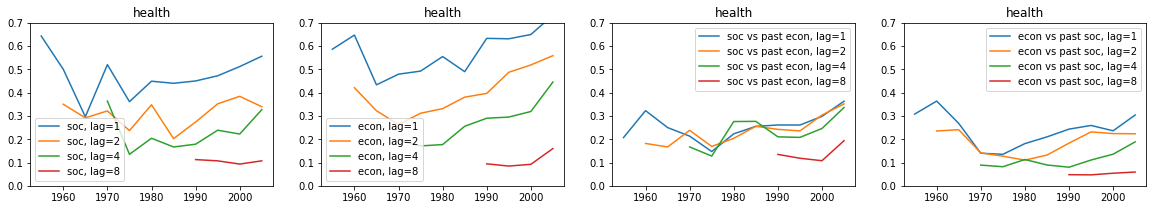

max accepted p-value: 0.000816110217553373


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008298576412521678


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


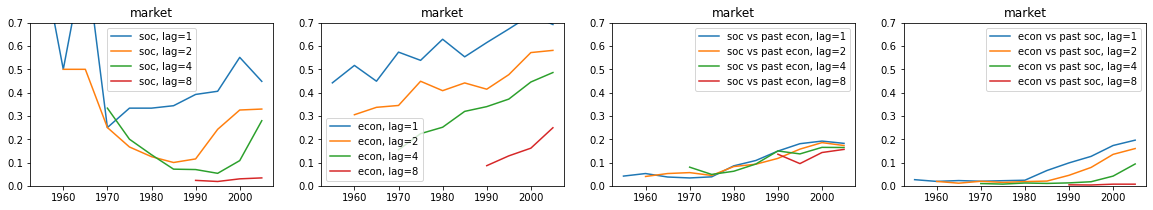

max accepted p-value: 0.0007179507649803648


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008324891189706913


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


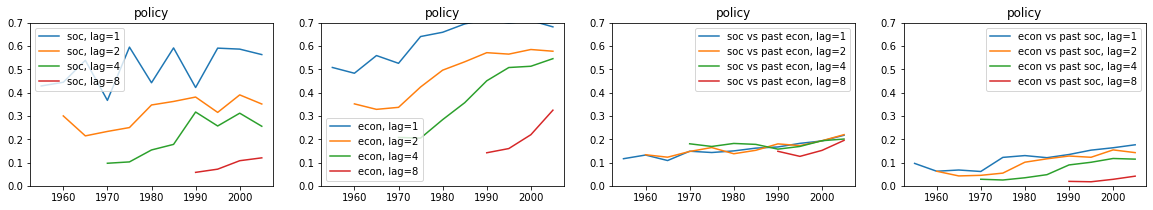

max accepted p-value: 0.0008148850732420249


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008310853427283521


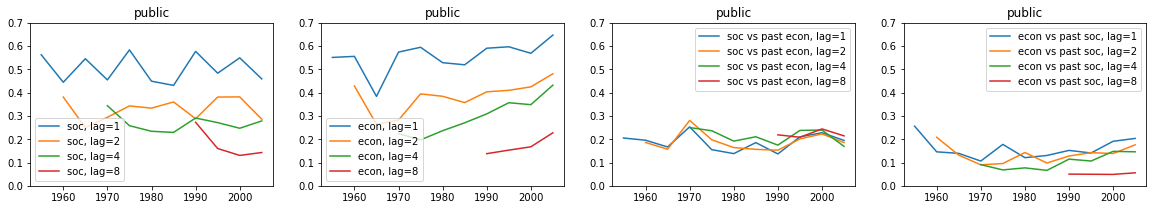

max accepted p-value: 0.0008282720418343496


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008243295131745022


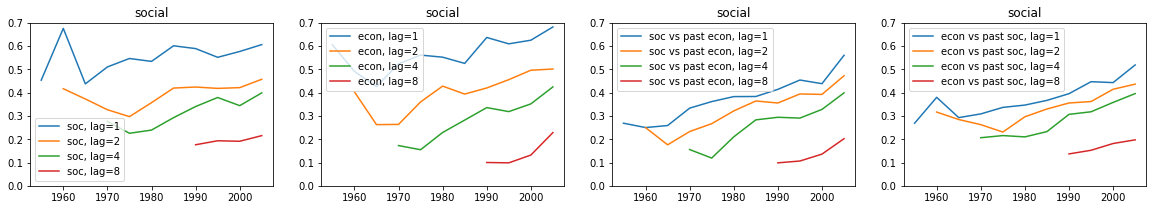

max accepted p-value: 5.198747725732156e-05


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008154846215958277


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


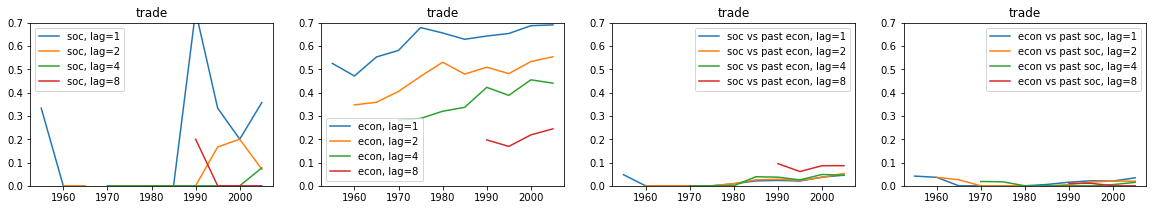

max accepted p-value: 0.0008321989087652422


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0008009799465518982


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


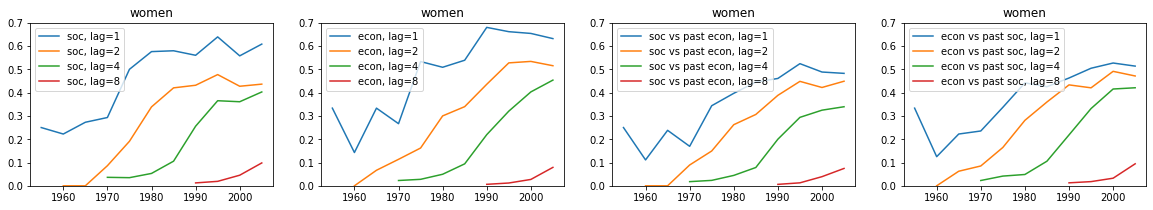

max accepted p-value: 0.0008053733995322573


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )
./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0007739857134511183


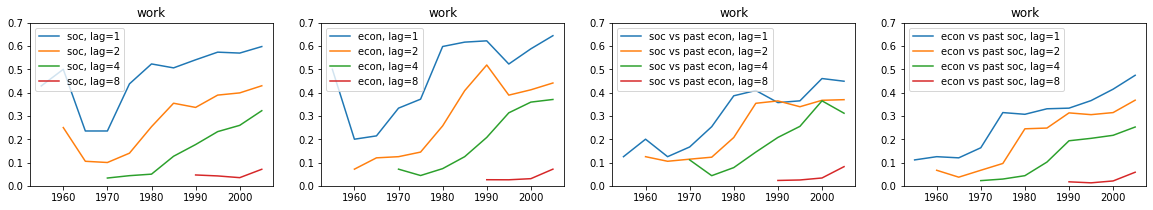

In [53]:
for focal in top_words:
    tn1 = get_tnets(cc_soc, focal, pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
    tn2 = get_tnets(cc_econ, focal, pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)

    plt.figure(figsize=(20,3))
    plt.subplot(1,4,1)
    for lag in [1, 2, 4, 8]:
        plt.plot(
            list(YS)[lag:],
            np.sum( (tn1[lag:,]>0) * (tn1[:-lag,]>0), axis=1 ) / np.sum( (tn1[lag:,]>0) | (tn1[:-lag,]>0), axis=1 ),
            label='soc, lag='+str(lag)
        );
    plt.ylim(0,0.7) # to keep things comparable
    plt.legend()
    plt.title(focal)

    plt.subplot(1,4,2)
    for lag in [1, 2, 4, 8]:
        plt.plot(
            list(YS)[lag:],
            np.sum( (tn2[lag:,]>0) * (tn2[:-lag,]>0), axis=1 ) / np.sum( (tn2[lag:,]>0) | (tn2[:-lag,]>0), axis=1 ),
            label='econ, lag='+str(lag)
        );
    plt.ylim(0,0.7) # to keep things comparable
    plt.legend()
    plt.title(focal)

    plt.subplot(1,4,3)
    for lag in [1, 2, 4, 8]:
        plt.plot(
            list(YS)[lag:],
            np.sum( (tn1[lag:,]>0) * (tn2[:-lag,]>0), axis=1 ) / np.sum( (tn1[lag:,]>0) | (tn2[:-lag,]>0), axis=1 ),
            label='soc vs past econ, lag='+str(lag)
        );
    plt.ylim(0,0.7) # to keep things comparable
    plt.legend()
    plt.title(focal)

    plt.subplot(1,4,4)
    for lag in [1, 2, 4, 8]:
        plt.plot(
            list(YS)[lag:],
            np.sum( (tn2[lag:,]>0) * (tn1[:-lag,]>0), axis=1 ) / np.sum( (tn2[lag:,]>0) | (tn1[:-lag,]>0), axis=1 ),
            label='econ vs past soc, lag='+str(lag)
        );
    plt.ylim(0,0.7) # to keep things comparable
    plt.legend()
    plt.title(focal)
    plt.show()

    # jaccard similarity between the disciplines and their own time-shifted selves
    # at a maximum of 3 words!